## Import & load

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pwd

'/Users/oslikdau/Documents/GitHub/important notebooks/House pricing'

In [6]:
train_data=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [7]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [8]:
# checking that cols in train and test are the same except last one (target) in train
train_data.iloc[:,:-1].columns==test_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
# combine into 1 dataset so that all data processing done in both sets
all_data=pd.concat([train_data,test_data])
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
# new var to split train & test
all_data['Train Dataset'] = 1
all_data['Train Dataset'].loc[all_data['SalePrice'].isna()] = 0
all_data['Train Dataset'].value_counts()

/Users/oslikdau/miniforge3/envs/tensorflow/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1    1460
0    1459
Name: Train Dataset, dtype: int64

In [11]:
# keep origin just in case
all_data_origin=all_data.copy()

## Data analysis

In [12]:
all_data.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Electrical         1
TotalBsmtSF        1
Exterior2nd        1
dtype: int64

In [13]:
all_data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [14]:
var_corr_price = all_data.corr()['SalePrice'].sort_values(ascending=False)

In [15]:
# only numeric var's do not correlate well w/Price. 
# MSSubClass, OverallCond - should be categorical
# YrSold - into Age
# MoSold, 3SsnPorch, MiscVal, Id - irrelevant
var_corr_price[var_corr_price.between(-0.1, 0.1)]

PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

In [16]:
# how many classes. 
# 
all_data.select_dtypes('object').nunique().sort_values(ascending=False).head(20)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
dtype: int64

In [17]:
# cross cat var's vs Price - correlation?
all_data.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [18]:
# share of zeros
# PoolArea 3SsnPorch LowQualFinSF MiscVal BsmtHalfBath - remove
(all_data[all_data == 0].count(axis=0)/len(all_data.index)).sort_values(ascending=False).head(20)

PoolArea         0.995546
3SsnPorch        0.987324
LowQualFinSF     0.986297
MiscVal          0.964714
BsmtHalfBath     0.939363
ScreenPorch      0.912299
BsmtFinSF2       0.880781
EnclosedPorch    0.842754
HalfBath         0.628297
MasVnrArea       0.595409
BsmtFullBath     0.584104
2ndFlrSF         0.571429
WoodDeckSF       0.521754
Train Dataset    0.499829
Fireplaces       0.486468
OpenPorchSF      0.444673
BsmtFinSF1       0.318260
BsmtUnfSF        0.082563
GarageCars       0.053786
GarageArea       0.053786
dtype: float64

## data prep

In [19]:
# convert 'num' into cat
num_cat_var = ['MSSubClass',
'OverallQual',
'OverallCond']
all_data[num_cat_var] = all_data[num_cat_var].astype('category')

In [20]:
# remove :
# almost all zeros - PoolArea 3SsnPorch LowQualFinSF MiscVal BsmtHalfBath
# irrelevant (no correl) - MoSold, 3SsnPorch, MiscVal, Id 
var_remove = [
    'Id',
    'MiscVal',
    'MoSold',
    'PoolArea', 
    '3SsnPorch', 
    'LowQualFinSF', 
    'MiscVal', 
    'BsmtHalfBath',
    'Alley',
    'Utilities',
    'PoolQC',
    'MiscFeature']
all_data.drop(var_remove, axis=1, inplace=True)

#### Years to Age

In [21]:
# transform to age
pd.set_option("max_rows", 10)
all_data['YearBuilt']=2011-all_data['YearBuilt']
all_data['YearRemodAdd']=2011-all_data['YearRemodAdd']
all_data['GarageYrBlt']=2011-all_data['GarageYrBlt']
all_data['YrSold']=2011-all_data['YrSold']

In [22]:
#check age transformation
all_data[
['YearBuilt', 
'YearRemodAdd',
'GarageYrBlt',
'YrSold']
].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2919.000000,2919.000000,2760.000000,2919.000000
mean,39.687222,26.735526,32.886594,3.207263
std,30.291442,20.894344,25.574285,1.314964
min,1.000000,1.000000,-196.000000,1.000000
25%,10.000000,7.000000,9.000000,2.000000
50%,38.000000,18.000000,32.000000,3.000000
75%,57.500000,46.000000,51.000000,4.000000
max,139.000000,61.000000,116.000000,5.000000


In [23]:
all_data['GarageYrBlt'].replace(-196, 4, inplace=True)

### transform integer into binary

In [24]:
# transform integer into binary (most values are zeros)

int_bin = ['WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'ScreenPorch']
all_data[int_bin]

,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,0,61,0,0
1,298,0,0,0
2,0,42,0,0
3,0,35,272,0
4,192,84,0,0
...,...,...,...,...
1454,0,0,0,0
1455,0,24,0,0
1456,474,0,0,0
1457,80,32,0,0


In [25]:
for i in int_bin:
    all_data[i]=np.where(all_data[i]==0,0,1)

In [26]:
# checking binary 
all_data[int_bin].apply(pd.Series.value_counts)

,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1523,1298,2460,2663
1,1396,1621,459,256


### Log Y

In [27]:
all_data['SalePrice']=np.log(all_data['SalePrice'])

In [28]:
all_data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

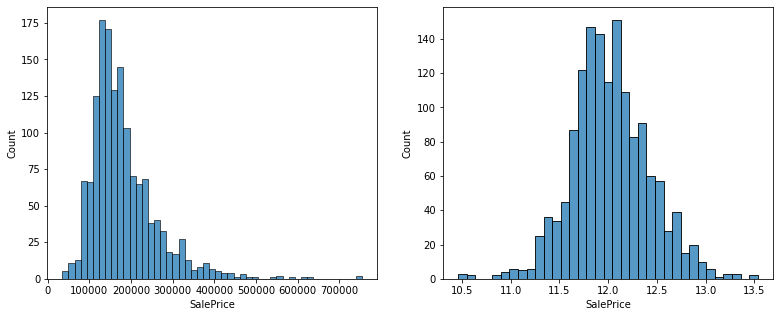

In [29]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(all_data_origin['SalePrice'])
plt.subplot(1,2,2)
sns.histplot(all_data['SalePrice'])

### Target encoding

In [30]:
from category_encoders import TargetEncoder

In [31]:
# копируем базу, так как заменяем много значений
all_data_enc=all_data.copy()

In [32]:
# берем нечисловые переменные
var_targ_enc = list(all_data_enc.select_dtypes(exclude=["number"]).columns.values)
len(var_targ_enc)

42

In [33]:
# replaced cat variables with 
for var in var_targ_enc:
    targ_enc=TargetEncoder()
    all_data_enc[var]=targ_enc.fit_transform(all_data_enc[var], all_data_enc['SalePrice'])

In [34]:
all_data_enc[var_targ_enc].describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
LandSlope,2919.0,12.023579,0.013894,12.020565,12.020565,12.020565,12.020565,12.130560
Street,2919.0,12.024060,0.022763,11.669821,12.025522,12.025522,12.025522,12.025522
Condition2,2919.0,12.023920,0.032091,11.593661,12.025895,12.025895,12.025895,12.367523
RoofMatl,2919.0,12.022487,0.041427,12.019216,12.019216,12.019216,12.019216,12.758245
Heating,2919.0,12.027146,0.055525,11.168008,12.032078,12.032078,12.032078,12.032078
...,...,...,...,...,...,...,...,...
KitchenQual,2918.0,12.023483,0.267222,11.504581,11.810592,11.810592,12.222337,12.633614
ExterQual,2919.0,12.024274,0.274410,11.304543,11.837985,11.837985,12.311282,12.764044
BsmtQual,2919.0,12.023392,0.274590,11.529680,11.810855,12.179882,12.179882,12.640394
Neighborhood,2919.0,12.017607,0.305029,11.446889,11.811468,11.933948,12.169416,12.676000


In [70]:
all_data_enc.shape

(2919, 72)

### One-hot encoding

In [87]:
# how many classes. 
all_data.select_dtypes(['object', 'category']).nunique().sort_values(ascending=False)

Neighborhood    25
MSSubClass      16
Exterior2nd     16
Exterior1st     15
OverallQual     10
                ..
LandSlope        3
GarageFinish     3
PavedDrive       3
Street           2
CentralAir       2
Length: 42, dtype: int64

In [119]:
all_data.select_dtypes(['object', 'category']).nunique().sum()

276

In [121]:
onehot_all = all_data['Train Dataset'].reset_index(drop=True)
cat_vars = list(all_data.select_dtypes(['object', 'category']).columns)
for var in cat_vars:
    dummies = pd.get_dummies(all_data[var], prefix=var).reset_index(drop=True)
    onehot_all = pd.concat([onehot_all, dummies], axis=1)


In [168]:
# remove all onehots with too few 1's
onehot_minors = onehot_all.columns[(onehot_all.mean()<0.01) | (onehot_all.mean()>0.99)]
for var in onehot_minors:
    onehot_all.drop(var, axis=1, inplace=True)

In [169]:
onehot_all.shape, all_data_enc.shape

((2919, 186), (2919, 72))

In [170]:
# onehot_all.drop('Train Dataset', axis=1, inplace=True)
all_data_enc = pd.concat([all_data_enc, onehot_all], axis=1)

### NaN replace

In [36]:
all_data_enc.columns[all_data_enc.isna().any()].tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SaleType',
 'SalePrice']

In [37]:
# убрали SalePrice
var_nan=['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SaleType']

for var in var_nan:
    all_data_enc[var].fillna(all_data_enc[var].median(), inplace=True)

## Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
km = KMeans(n_clusters=5,random_state=123)
km.fit_predict(all_data_enc[var_targ_enc])

array([1, 0, 1, ..., 3, 2, 0], dtype=int32)

In [40]:
silhouette_score(all_data_enc[var_targ_enc], km.labels_)

0.1294070532520375

In [41]:
# add cluster variable based on categorical variables
all_data_enc.reset_index(inplace=True)
all_data_enc = pd.concat([all_data_enc, pd.Series(km.labels_, name='Cluster1')], axis=1)

In [42]:
# 5 clusters - quite good differentiation (groups rather even)
all_data_enc[['Cluster1', 'SalePrice']].groupby('Cluster1').mean()

,SalePrice
Cluster1,
0,11.982162
1,12.259193
2,11.488087
3,11.714878
4,12.710243


In [43]:
# to remove redu
# all_data_enc.drop(['level_0','index', 'Cluster1'], axis=1, inplace=True, errors='ignore')

In [44]:
all_data_enc.drop(['level_0','index'], axis=1, inplace=True, errors='ignore')

## Robust Scaling

In [45]:
from sklearn.preprocessing import RobustScaler

In [173]:
all_data_enc_st = all_data_enc.drop(['SalePrice', 'Train Dataset'], axis=1)

In [174]:
r_scaler=RobustScaler()
cols = all_data_enc_st.columns
all_data_enc_st = r_scaler.fit_transform(all_data_enc_st)
# turn back to DF and column names
all_data_enc_st=pd.DataFrame(all_data_enc_st, columns=cols)

In [175]:
# возвращаем train set classifer и Y
all_data_enc_st['SalePrice']=np.array(all_data_enc['SalePrice'])
all_data_enc_st['Train Dataset']=np.array(all_data_enc['Train Dataset'])
all_data_enc_st.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,-0.085733,0.635983,-1.733748,-0.667337,0.000000,0.332663,0.804405
MSZoning,2919.0,-0.065557,0.174081,-0.967514,0.000000,0.000000,0.000000,0.160731
LotFrontage,2919.0,0.060466,1.184328,-2.611111,-0.444444,0.000000,0.555556,13.611111
LotArea,2919.0,0.174759,1.927418,-1.992424,-0.482649,0.000000,0.517351,50.291300
Street,2919.0,-0.001462,0.022763,-0.355701,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
SaleCondition_Family,2919.0,0.015759,0.124562,0.000000,0.000000,0.000000,0.000000,1.000000
SaleCondition_Normal,2919.0,-0.177115,0.381832,-1.000000,0.000000,0.000000,0.000000,0.000000
SaleCondition_Partial,2919.0,0.083933,0.277335,0.000000,0.000000,0.000000,0.000000,1.000000
SalePrice,1460.0,12.024051,0.399452,10.460242,11.775097,12.001505,12.273731,13.534473


## Modeling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

In [176]:
all_data_enc_tr = all_data_enc_st[all_data_enc_st['Train Dataset']==1]
all_data_enc_tr = all_data_enc_tr.drop('Train Dataset', axis=1)

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(all_data_enc_tr.drop('SalePrice', axis=1), all_data_enc_tr['SalePrice'], random_state=42)

In [178]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1095, 256), (1095,), (365, 256), (365,))

### Ridge

In [179]:
rdg=Ridge(random_state=666)

In [180]:
rdg.fit(X_train, Y_train)

Ridge(random_state=666)

In [181]:
print('train, RMSLE: ', str(mean_squared_log_error(np.exp(Y_train), np.exp(rdg.predict(X_train)), squared=False)))
print('test, RMSLE: ', str(mean_squared_log_error(np.exp(Y_test), np.exp(rdg.predict(X_test)), squared=False)))

train, RMSLE:  0.10573286133828429
test, RMSLE:  0.13312286403456466


### GradBoost

In [182]:
from sklearn.ensemble import GradientBoostingRegressor
grdb=GradientBoostingRegressor(random_state=666)
grdb.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=666)

In [183]:
print('train, RMSLE: ', str(mean_squared_log_error(np.exp(Y_train), np.exp(grdb.predict(X_train)), squared=False)))
print('test, RMSLE: ', str(mean_squared_log_error(np.exp(Y_test), np.exp(grdb.predict(X_test)), squared=False)))

train, RMSLE:  0.07448774658462977
test, RMSLE:  0.12363297230206635


### Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=666)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=666)

In [185]:
print('train, RMSLE: ', str(mean_squared_log_error(np.exp(Y_train), np.exp(rfr.predict(X_train)), squared=False)))
print('test, RMSLE: ', str(mean_squared_log_error(np.exp(Y_test), np.exp(rfr.predict(X_test)), squared=False)))

train, RMSLE:  0.055104915346964295
test, RMSLE:  0.13455749357423089


проверить на каких данных самые большие отличия

### Comparison

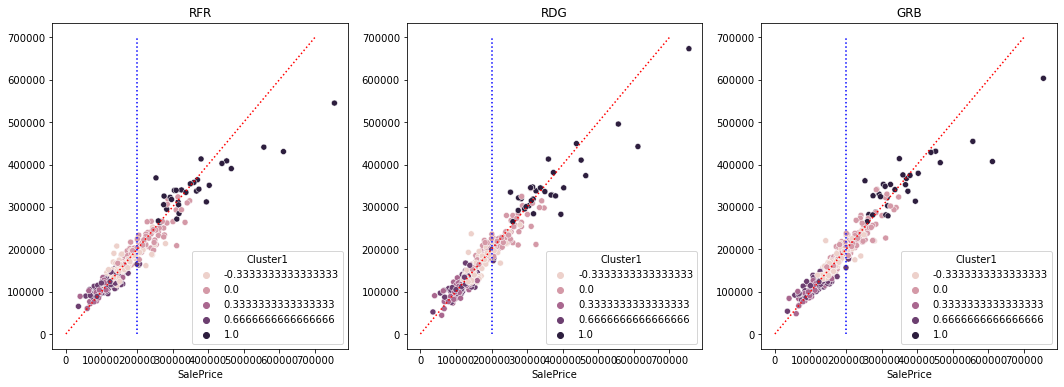

In [186]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.scatterplot(x=np.exp(Y_test), y=np.exp(rfr.predict(X_test)), hue=X_test['Cluster1']).set_title('RFR')
plt.plot([1,700000],[1,700000],'r:')
plt.plot([200000,200000],[1,700000],'b:')
plt.subplot(1,3,2)
sns.scatterplot(x=np.exp(Y_test), y=np.exp(rdg.predict(X_test)), hue=X_test['Cluster1']).set_title('RDG')
plt.plot([1,700000],[1,700000],'r:')
plt.plot([200000,200000],[1,700000],'b:')
plt.subplot(1,3,3)
sns.scatterplot(x=np.exp(Y_test), y=np.exp(grdb.predict(X_test)), hue=X_test['Cluster1']).set_title('GRB')
plt.plot([1,700000],[1,700000],'r:')
plt.plot([200000,200000],[1,700000],'b:');

In [191]:
compar = pd.DataFrame([np.array(np.exp(Y_test)), np.exp(rfr.predict(X_test)), X_test['Cluster1']]).T
compar.columns=['Y', 'Pred','Clust']
# compar

In [192]:
compar.groupby(['Clust']).mean()

,Y,Pred
Clust,,
-0.333333,158050.104762,157085.352465
0.000000,215724.831776,211168.368745
0.333333,102080.303030,105722.388742
0.666667,122575.988764,120030.490293
1.000000,361750.354839,342990.842612


### Stacking

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [193]:
estimators = [
            ('grdb', GradientBoostingRegressor(random_state=666)),
            ('rfr', RandomForestRegressor(random_state=666)),
            ('rdg', Ridge(random_state=666))]

In [194]:
stk_reg = StackingRegressor(
        estimators=estimators
        )

In [210]:
X_train_all = all_data_enc_tr.drop('SalePrice', axis=1)
Y_train_all = all_data_enc_tr['SalePrice']

In [212]:
stk_reg.fit(X_train_all, Y_train_all)

StackingRegressor(estimators=[('grdb',
                               GradientBoostingRegressor(random_state=666)),
                              ('rfr', RandomForestRegressor(random_state=666)),
                              ('rdg', Ridge(random_state=666))])

In [213]:
print('train, RMSLE: ', str(mean_squared_log_error(np.exp(Y_train), np.exp(stk_reg.predict(X_train)), squared=False)))
print('test, RMSLE: ', str(mean_squared_log_error(np.exp(Y_test), np.exp(stk_reg.predict(X_test)), squared=False)))

train, RMSLE:  0.07551726895716346
test, RMSLE:  0.07188948856541395


#### filling sales for test data (with Ridge)

In [68]:
all_data_enc_tst = all_data_enc_st[all_data_enc_st['Train Dataset']==0]
all_data_enc_tst = all_data_enc_tst.drop(['Train Dataset', 'SalePrice'], axis=1)

In [69]:
all_data_enc_tst['SalePrice'] = grdb1.predict(all_data_enc_tst)

NameError: name 'grdb1' is not defined

In [ ]:
all_data_enc_tst.shape, all_data_enc_tr.shape

((1459, 71), (1460, 71))

In [ ]:
all_data_grb = pd.concat([all_data_enc_tr, all_data_enc_tst])

NameError: name 'pd' is not defined

## To Kaggle

In [214]:
# Для подключения стандартизированных данных из выборки ТЕСТ
all_data_enc_tst=all_data_enc_st[all_data_enc_st['Train Dataset']==0].iloc[:,:-2]
# all_data_origin

In [215]:
Y_for_Kaggle=np.exp(stk_reg.predict(all_data_enc_tst))

In [216]:
DF_Kaggle=pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')
DF_Kaggle['SalePrice']=pd.DataFrame(Y_for_Kaggle)
DF_Kaggle.to_csv('Kaggle_submission.csv', index=False)

In [220]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f Kaggle_submission.csv -m "all above + onehot's"

100%|██████████████████████████████████████| 33.7k/33.7k [00:02<00:00, 15.9kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

- добавить one-hot для категорийных (по крайней мере для основных, половины)
- кластеризация на переменных по группам (по смыслу)
- LGBM
- анализ больших отклонений (MSE - чем больше отклонение тем больше вклад в ошибку)